# Supermarket Customer Segmentation Data - Clustering and Analysis

# 1. Importing the libraries

In [6]:
### Data Wrangling

import numpy as np
import pandas as pd
from collections import Counter

### Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Clustering
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score
from tabulate import tabulate
from sklearn.cluster import AgglomerativeClustering
### Remove unnecessary warnings

import warnings
warnings.filterwarnings('ignore')

# 2. Importing the data

In [7]:
### Fetching the datsets

dataset = pd.read_csv('supermarket_Customers.csv')

In [8]:
### Looking at the sample records of the dataset

dataset.tail(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
190,191,Female,34,103,23
191,192,Female,32,103,69
192,193,Male,33,113,8
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [9]:
### Shape of the dataset

dataset.shape

(200, 5)

The dataset consists of 5 columns and 200 rows.

# 3. Exploratory Data Analysis (EDA)

#### 3.1 Missing Data, and Summary Statistics

In [10]:
### Looking at the modified datatypes of the dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
# Checking  missing  values 
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Here, we can see that there are no missing values in the columns.

In [12]:
### Summary statistics of the numerical columns in the dataset

dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


##### 3.2.1 Categorical variable - Gender

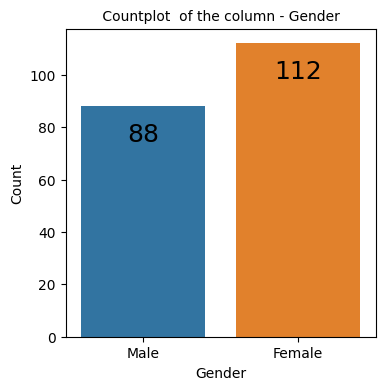

In [13]:
# Countplot  of the column - Gender
plt.figure(figsize=(4,4))
pd =sns.countplot(x = "Gender" ,  data=dataset)
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=18,
                   xytext = (0, -20), 
                   textcoords = 'offset points')
plt.xlabel("Gender", size=10)
plt.ylabel("Count" ,size=10)
plt.title (" Countplot  of the column - Gender " , size=10)
plt.show()
# From here we get  that females are more than  males in  dataset

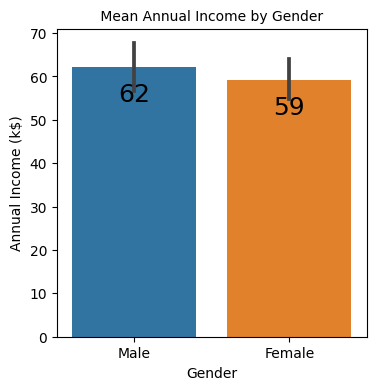

In [14]:
# Mean Annual Income by Gender
plt.figure(figsize=(4,4))
pd =sns.barplot(x = "Gender" , y ='Annual Income (k$)'  , data=dataset)
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=18,
                   xytext = (0, -20), 
                   textcoords = 'offset points')
plt.xlabel("Gender", size=10)
plt.ylabel("Annual Income (k$)" ,size=10)
plt.title (" Mean Annual Income by Gender " , size=10)
plt.show()
# From here we get that average annual income is more in Male as compared to female.

In [16]:
### Mean Spending Score by Gender

gender_score = dataset[['Gender', 'Spending Score (1-100)']].groupby('Gender', as_index = False).mean()

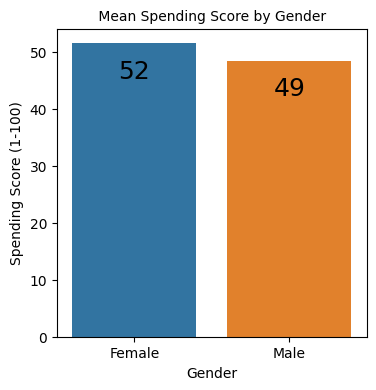

In [17]:
### Mean Spending Score by Gender
plt.figure(figsize=(4,4))
pd =sns.barplot(x = "Gender" , y ='Spending Score (1-100)'  , data=gender_score)
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=18,
                   xytext = (0, -20), 
                   textcoords = 'offset points')
plt.xlabel("Gender", size=10)
plt.ylabel("Spending Score (1-100)" ,size=10)
plt.title (" Mean Spending Score by Gender " , size=10)
plt.show()
# From here we get that spending score of females are more 
#than males means female spend more as compared to males.

In [18]:
### Mean Age by Gender

gender_age = dataset[['Gender', 'Age']].groupby('Gender', as_index = False).mean()

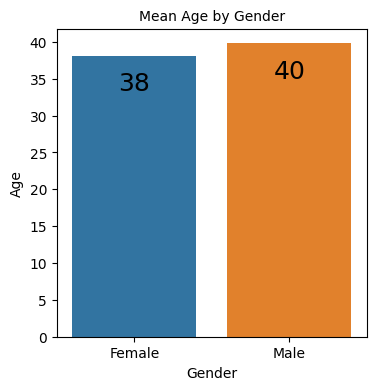

In [19]:
### Mean Age by Gender
plt.figure(figsize=(4,4))
pd =sns.barplot(x = "Gender" , y ='Age'  , data=gender_age)
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=18,
                   xytext = (0, -20), 
                   textcoords = 'offset points')
plt.xlabel("Gender", size=10)
plt.ylabel("Age" ,size=10)
plt.title ("Mean Age by Gender" , size=10)
plt.show()
# From the above graph, we can see that the average age is slightly higher in Male customers than the Female customers.

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

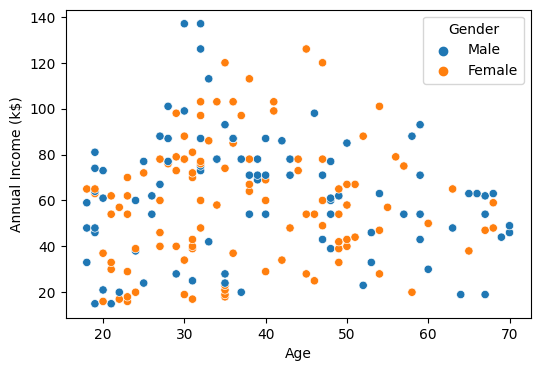

In [22]:
### Scatterplot between Age and Annual Income
plt.figure(figsize=(6,4))
sns.scatterplot(data = dataset, x = "Age", y = "Annual Income (k$)", hue = "Gender")

from the graph  there is no significant relationship between Age and Annual Income (k$).

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

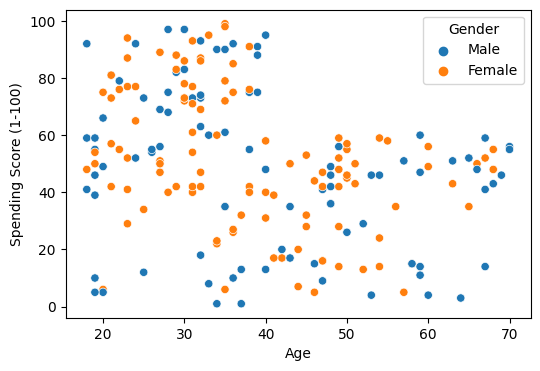

In [23]:
### Scatterplot between Age and Spending Score (1-100)
plt.figure(figsize=(6,4))
sns.scatterplot(data = dataset, x = "Age", y = "Spending Score (1-100)", hue = "Gender")

From the above graphthere is no significant relationship between Age and Spending Score (1-100).

From the above graph, we can see that the data has a slight degree of skewness and a hint of an outlier.

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

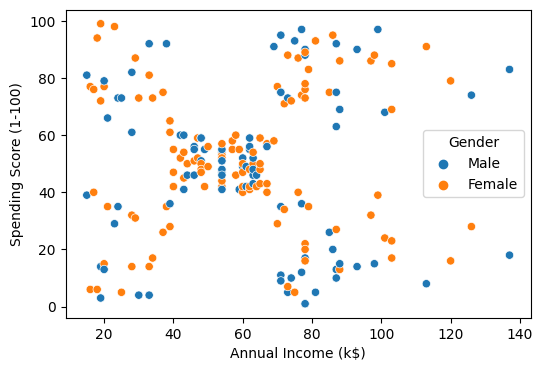

In [25]:
### Scatterplot between Annual Income and Spending Score
plt.figure(figsize=(6,4))
sns.scatterplot(data = dataset, x = "Annual Income (k$)", y = "Spending Score (1-100)", hue = "Gender")

From the above graph, we can see that the data is slightly skewed and there are no outliers.

# 4. Data preprocessing

Data preprocessing is the process of getting our dataset ready for model training. In this section, we will perform the following preprocessing steps:

1. Detect and remove outliers in numerical variables
2. Drop and fill missing values

#### 4.1 Detect and remove outliers in numerical variables

Outliers are data points that have extreme values and they do not conform with the majority of the data. It is important to address this because outliers tend to skew our data towards extremes and can cause inaccurate model predictions. I will use the Tukey method to remove these outliers.

Here, we will write a function that will loop through a list of features and detect outliers in each one of those features. In each loop, a data point is deemed an outlier if it is less than the first quartile minus the outlier step or exceeds third quartile plus the outlier step. The outlier step is defined as 1.5 times the interquartile range. Once the outliers have been determined for one feature, their indices will be stored in a list before proceeding to the next feature and the process repeats until the very last feature is completed. Finally, using the list with outlier indices, we will count the frequencies of the index numbers and return them if their frequency exceeds n times.

In [27]:
def detect_outliers(df, n, features_list):
    outlier_indices = [] 
    for feature in features_list: 
        Q1 = np.percentile(df[feature], 25)
        Q3 = np.percentile(df[feature], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[feature] < Q1 - outlier_step) | (df[feature] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

outliers_to_drop = detect_outliers(dataset, 2, ['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

We will drop these 0 indices:  []


From the above cell, we can see that there are no significant outliers in the dataset.

#### 4.2 Drop and fill missing values

Since the dataset has no missing values, we will focus on removing the counter column - CustomerID.

In [28]:
### Dropping the columns - CustomerId from the dataset

dataset.drop(['CustomerID'], axis = 1, inplace = True)
dataset

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


# 5. Clustering

Here, we will use K-Means and Hierarchial clustering for customer segmentation based on:

1. Age and Spending Score
2. Annual Income and Spending Score
3. Age, Annual Income, and Spending Score

We then select the best model for segmentation using the Silhouette score.

#### 5.1 Segmentation using Age and Spending Score (K- Means)

In [29]:
### Filtering the age and spending score from the dataset

X = dataset[['Age', 'Spending Score (1-100)']].iloc[:, :].values

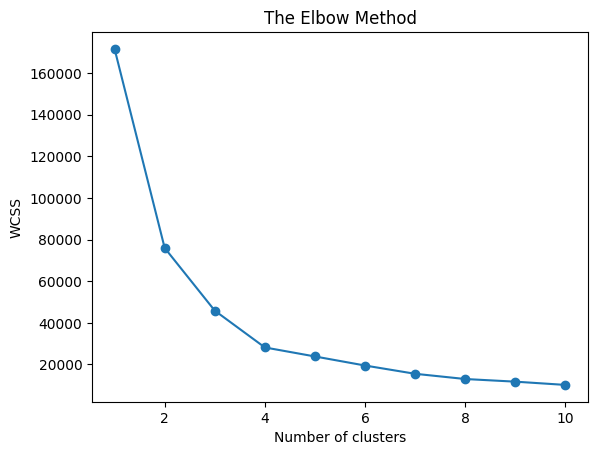

In [30]:
### Using the elbow method to find the optimal number of clusters

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker = 'o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From the above graph, we can see that the optimal number of clusters are 4.

In [31]:
### Training the K-Means model on the dataset

kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

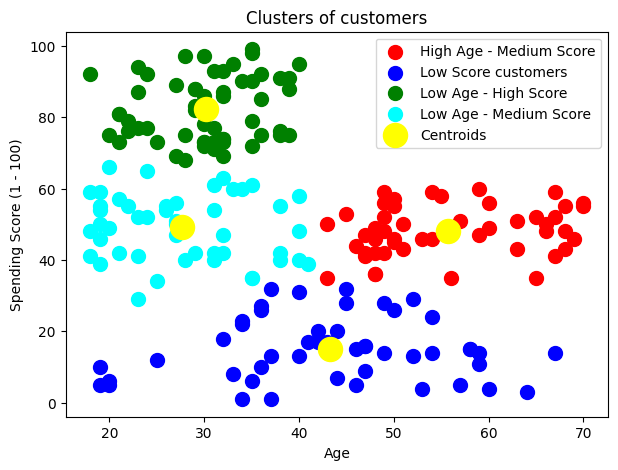

In [32]:
### Visualizing the clusters

plt.figure(figsize = (7, 5))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'High Age - Medium Score')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Low Score customers')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Low Age - High Score')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Low Age - Medium Score')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1 - 100)')
plt.legend()
plt.show()

From the above graph, we can see that there are 5 clusters.

1. High Age - Medium Score customers: From this cluster, we can see that the customers belonging to this cluster belong to 40+ age group and have a 35 - 60 spending score.
2. Low Score customers: These are the customers that do not spend a lot in the supermarket. The target of the mall should be to reduce the number of customers in the blue cluster.
3. Low Age - High Score customers: From this cluster, we can see that the customers belonging to this cluster belong to <40 age group and have a spending score greater than 70.
4. Low Age - Medium Score customers: From this cluster, we can see that the customers belonging to this cluster belong to <40 age and have a spending score in the range of 35 and 65.

In [33]:
### Calculating the performance of the clusters

silhouette_score_kmeans = round(silhouette_score(X, y_kmeans), 2)
print('Silhouette Score : {}'.format(silhouette_score_kmeans))

Silhouette Score : 0.5


#### 5.2 Segmentation using Age and Spending Score (Hierarchial clustering)

In [231]:
### Filtering the age and spending score from the dataset

X = dataset[['Age', 'Spending Score (1-100)']].iloc[:, :].values

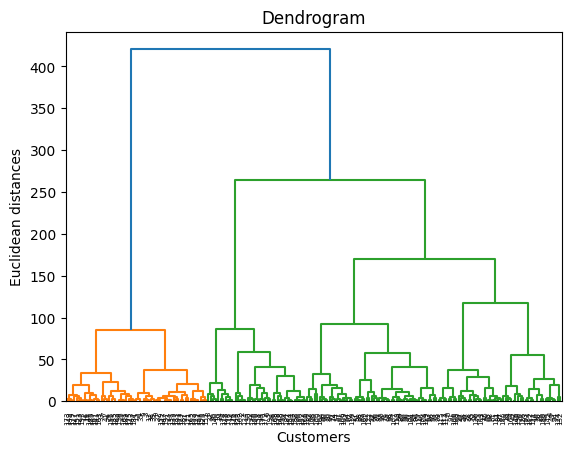

In [232]:
### Using the dendrogram to find the optimal number of clusters

dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

From the above graph, we can see that the optimal number of clusters are 2.

In [233]:
### Training the Hierarchial clustering model on the dataset

hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

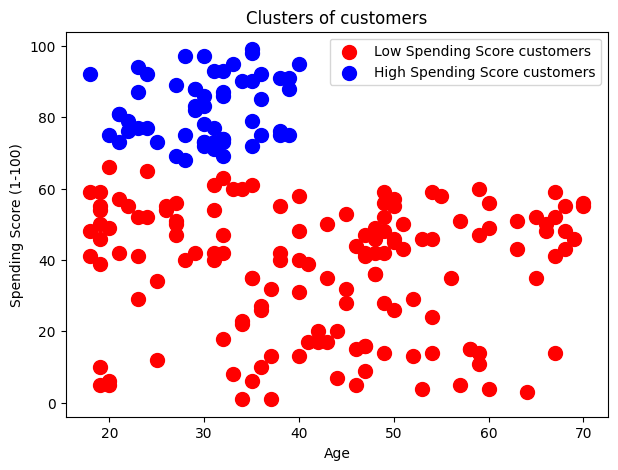

In [234]:
### Visualizing the clusters

plt.figure(figsize = (7, 5))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Low Spending Score customers')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'High Spending Score customers')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

From the above graph, we can see that there are 2 clusters.

1. Low Spending Score customers: From the above graph, we can see that these are the customers with low spending score. 
2. High Spending Score customers: From the above graph, we can see that these are the customers with high spending score. 

The ideal scenario for the mall should be to reduce the number of customers in the red cluster and increase the number of clusters.

In [235]:
### Calculating the performance of the clusters

silhouette_score_hc = round(silhouette_score(X, y_hc), 2)

print('Silhouette Score : {}'.format(silhouette_score_hc))


Silhouette Score : 0.45


In [236]:
### Tabulating the results

table = []
print('Segmentation using Age and Spending Score')
table.append(['S.No', 'Clustering Model', 'Silhouette Score'])
table.append([1, 'K - Means clustering', silhouette_score_kmeans])
table.append([2, 'Hierarchial clustering', silhouette_score_hc])
a = tabulate(table, headers = 'firstrow', tablefmt = 'fancy_grid')
print(tabulate(table, headers = 'firstrow', tablefmt = 'fancy_grid'))

Segmentation using Age and Spending Score
╒════════╤════════════════════════╤════════════════════╕
│   S.No │ Clustering Model       │   Silhouette Score │
╞════════╪════════════════════════╪════════════════════╡
│      1 │ K - Means clustering   │               0.5  │
├────────┼────────────────────────┼────────────────────┤
│      2 │ Hierarchial clustering │               0.45 │
╘════════╧════════════════════════╧════════════════════╛


From the above table, we can see that K-Means performs better than Hierarchial clustering on comparing the Silhouette score

#### 5.3 Segmentation using Annual Income and Spending Score (K-Means)

In [237]:
### Filtering the annual income and spending score from the dataset

X = dataset[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[:, :].values

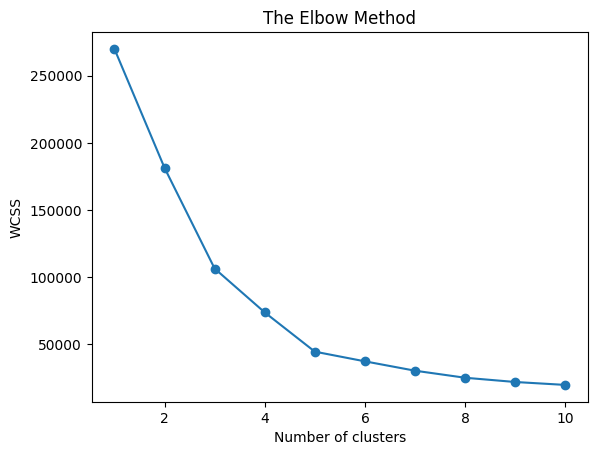

In [238]:
### Using the elbow method to find the optimal number of clusters

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker = 'o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From the above graph, we can see that the optimal number of clusters are 5.

In [239]:
### Training the K-Means model on the dataset

kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

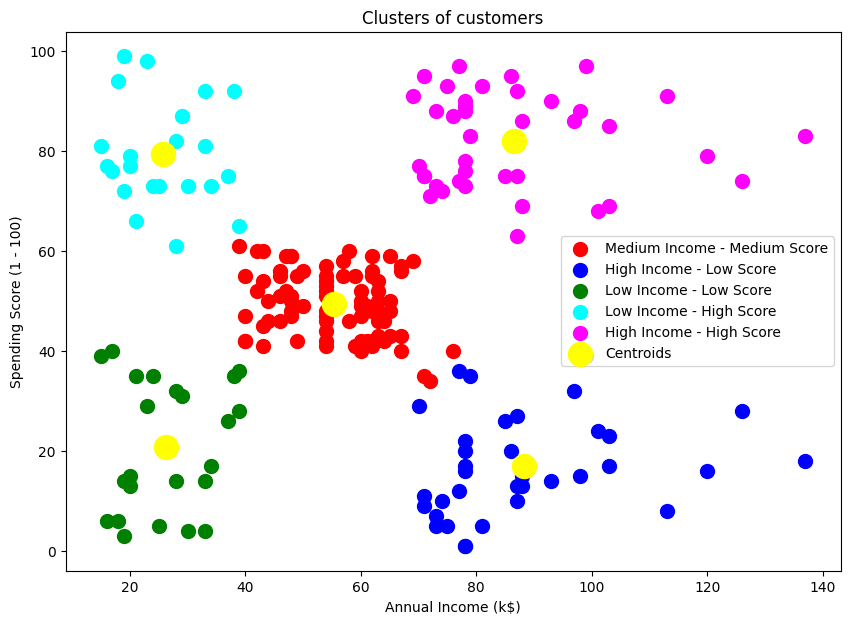

In [240]:
### Visualizing the clusters

plt.figure(figsize = (10, 7))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Medium Income - Medium Score')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'High Income - Low Score')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Low Income - Low Score')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Low Income - High Score')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'High Income - High Score')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1 - 100)')
plt.legend()
plt.show()

From the above graph, we can see that there are 5 clusters.

1. Medium Income - Medium Score customers: From the above graph, we can see that the customers belonging to this cluster have an income range of 40 - 80 and have a spending score in the range of 40 - 60.
2. High Income - Low Score customers: From the above graph, we can see that the customers belonging to this cluster have an income range of > 65 and have a spending score of less than 40.
3. Low Income - Low Score customers: From the above graph, we can see that the customers belonging to this cluster have an income range of < 40 and have a spending score of less than 40.
4. Low Income - High Score customers: From the above graph, we can see that the customers belonging to this cluster have an income range of < 40 and have a spending score of greater than 60.
5. High Income - High Score customers: From the above graph, we can see that the customers belonging to this cluster have an income range of > 70 and have a spending score of greater than 60.

The aim of the supermarket is to increase the customers present in the cluster 'High Income - High Score' by reducing the customers present in the cluster 'High Income - Low Score' and also to migrate the customers present in the cluster 'Medium Income - Medium Score' to higher spending scores.

In [241]:
### Calculating the performance of the clusters

silhouette_score_kmeans = round(silhouette_score(X, y_kmeans), 2)

print('Silhouette Score : {}'.format(silhouette_score_kmeans))


Silhouette Score : 0.55


#### 5.4 Segmentation using Annual Income and Spending Score (Hierarchial clustering)

In [242]:
### Filtering the annual income and spending score from the dataset

X = dataset[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[:, :].values

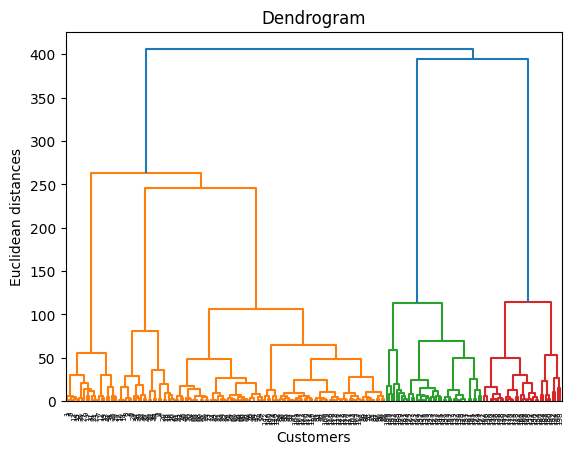

In [243]:
### Using the dendrogram to find the optimal number of clusters

dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

From the above graph, we can see that the optimal number of clusters are 3.

In [244]:
### Training the Hierarchial clustering model on the dataset

hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

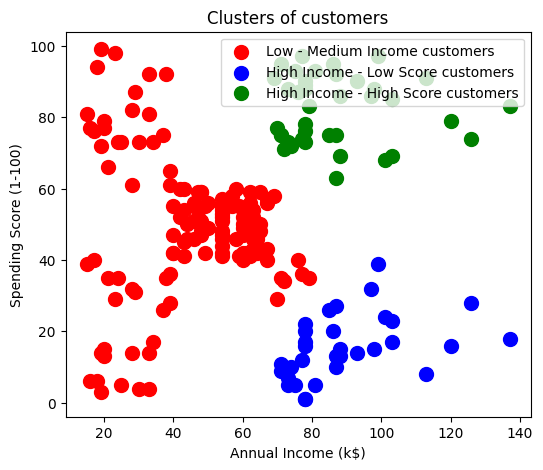

In [245]:
### Visualizing the clusters

plt.figure(figsize = (6, 5))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Low - Medium Income customers')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'High Income - Low Score customers')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'High Income - High Score customers')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

From the above graph, we can see that there are 3 clusters.

1. Low - Medium Income customers: From the above graph, we can see that the customers present in this cluster belong to low to medium income groups.
2. High Income - Low Score customers: From the above graph, we can see that the customers present in this cluster have an income group of > 70 and have a low spending score of < 40.
3. High Income - High Score customers: From the above graph, we can see that the customers present in this cluster have an income group of > 70 and have a high spending score of > 60.

The aim of the supermarket should be to increase the customers present in the cluster 'High Income - High Score customers' by reducing the customers present in the cluster 'High Income - Low Score customers' and also to make efforts to increase the Spending Score of the customers present in the cluster 'Low - Medium Income customers'.

In [246]:
### Calculating the performance of the clusters

silhouette_score_hc = round(silhouette_score(X, y_hc), 2)


print('Silhouette Score : {}'.format(silhouette_score_hc))


Silhouette Score : 0.46


In [247]:
### Tabulating the results

table = []
print('Segmentation using Annual Income and Spending Score')
table.append(['S.No', 'Clustering Model', 'Silhouette Score'])
table.append([1, 'K - Means clustering', silhouette_score_kmeans])
table.append([2, 'Hierarchial clustering', silhouette_score_hc])
b = tabulate(table, headers = 'firstrow', tablefmt = 'fancy_grid')
print(tabulate(table, headers = 'firstrow', tablefmt = 'fancy_grid'))

Segmentation using Annual Income and Spending Score
╒════════╤════════════════════════╤════════════════════╕
│   S.No │ Clustering Model       │   Silhouette Score │
╞════════╪════════════════════════╪════════════════════╡
│      1 │ K - Means clustering   │               0.55 │
├────────┼────────────────────────┼────────────────────┤
│      2 │ Hierarchial clustering │               0.46 │
╘════════╧════════════════════════╧════════════════════╛


From the above table, we can see that K-Means performs better than Hierarchial clustering on comparing the Silhouette score .

#### 5.5 Segmentation using Age, Annual Income, and Spending Score (K-Means)

In [248]:
### Filtering the age, annual income and spending score from the dataset

X = dataset[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].iloc[:, :].values

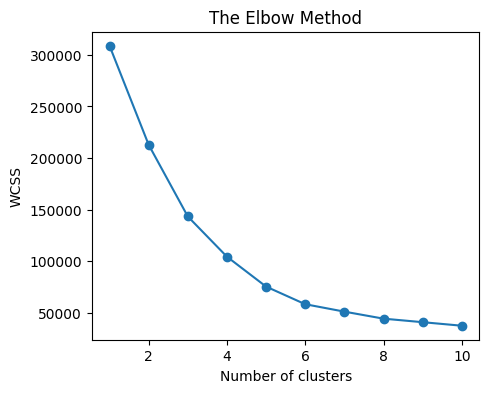

In [249]:
### Using the elbow method to find the optimal number of clusters

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize = (5, 4))
plt.plot(range(1, 11), wcss, marker = 'o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From the above graph, we can see that the optimal number of clusters are 6.

In [250]:
### Training the K-Means model on the dataset

kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

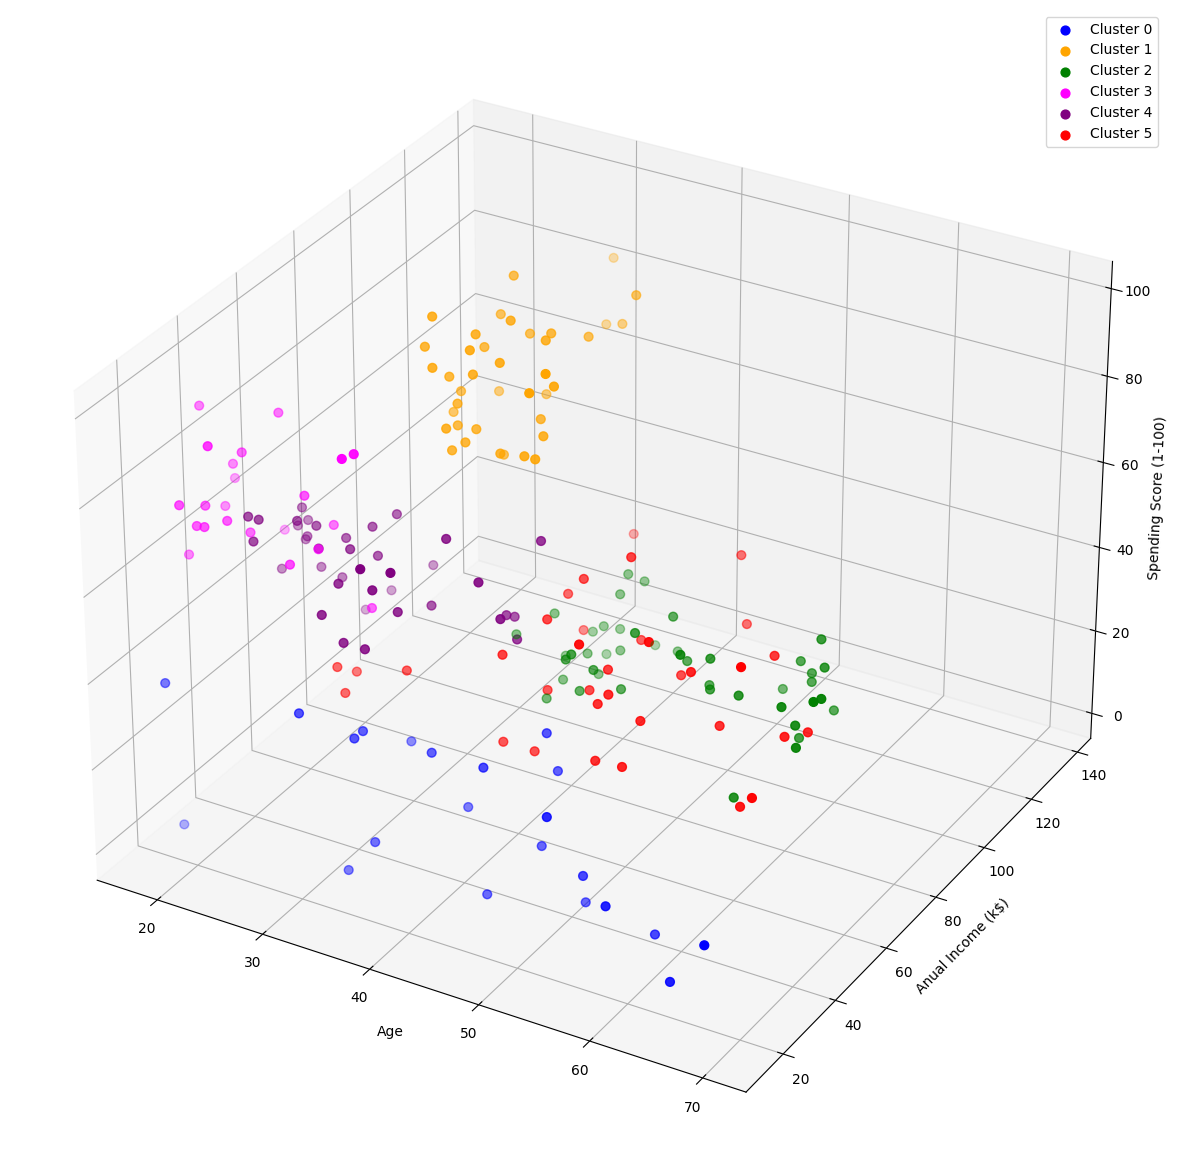

In [251]:
### Visualizing the clusters
# here we will  use 3d because we have 3 input  variables 

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], X[y_kmeans == 0, 2], s = 40 , color = 'blue', label = "Cluster 0")
ax.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], X[y_kmeans == 1, 2], s = 40 , color = 'orange', label = "Cluster 1")
ax.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], X[y_kmeans == 2, 2], s = 40 , color = 'green', label = "Cluster 2")
ax.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], X[y_kmeans == 3, 2], s = 40 , color = 'magenta', label = "Cluster 3")
ax.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], X[y_kmeans == 4, 2], s = 40 , color = 'purple', label = "Cluster 4")
ax.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], X[y_kmeans == 5, 2], s = 40 , color = 'red', label = "Cluster 5")
ax.set_xlabel('Age')
ax.set_ylabel('Anual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.legend()
plt.show()

In [252]:
### Calculating the performance of the clusters

silhouette_score_kmeans = round(silhouette_score(X, y_kmeans), 2)

print('Silhouette Score : {}'.format(silhouette_score_kmeans))

Silhouette Score : 0.45


#### 5.6 Segmentation using Age, Annual Income, and Spending Score (Hierarchial Clustering)

In [253]:
### Filtering the age, annual income and spending score from the dataset

X = dataset[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].iloc[:, :].values

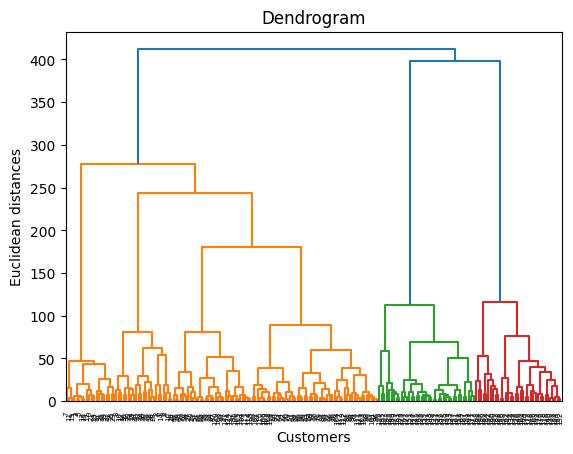

<Figure size 500x400 with 0 Axes>

In [254]:
### Using the dendrogram to find the optimal number of clusters

dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.figure(figsize = (5, 4))
plt.show()

From the above graph, we can see that the optimal number of clusters are 3.

In [255]:
### Training the Hierarchial clustering model on the dataset

hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

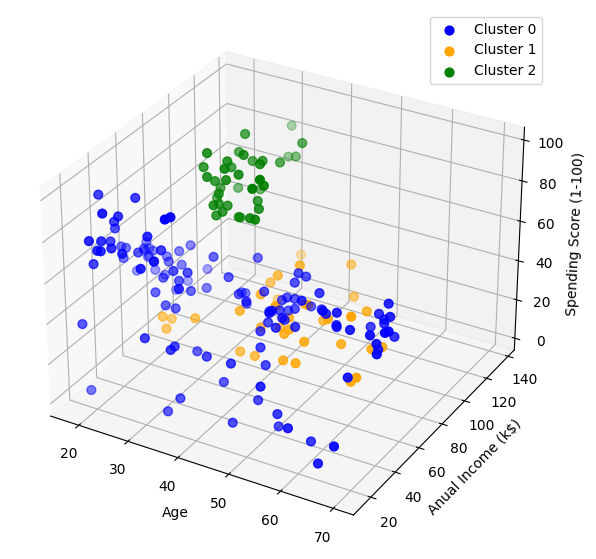

In [256]:
### Visualizing the clusters

fig = plt.figure(figsize = (8,7))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], X[y_hc == 0, 2], s = 40 , color = 'blue', label = "Cluster 0")
ax.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], X[y_hc == 1, 2], s = 40 , color = 'orange', label = "Cluster 1")
ax.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], X[y_hc == 2, 2], s = 40 , color = 'green', label = "Cluster 2")
ax.set_xlabel('Age')
ax.set_ylabel('Anual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.legend()
plt.show()

In [257]:
### Calculating the performance of the clusters

silhouette_score_hc = round(silhouette_score(X, y_hc), 2)

print('Silhouette Score : {}'.format(silhouette_score_hc))

Silhouette Score : 0.38


In [258]:
### Tabulating the results

table = []
print('Segmentation using Age, Annual Income, and Spending Score')
table.append(['S.No', 'Clustering Model', 'Silhouette Score'])
table.append([1, 'K - Means clustering', silhouette_score_kmeans])
table.append([2, 'Hierarchial clustering', silhouette_score_hc])
c= tabulate(table, headers = 'firstrow', tablefmt = 'fancy_grid')
print(tabulate(table, headers = 'firstrow', tablefmt = 'fancy_grid'))

Segmentation using Age, Annual Income, and Spending Score
╒════════╤════════════════════════╤════════════════════╕
│   S.No │ Clustering Model       │   Silhouette Score │
╞════════╪════════════════════════╪════════════════════╡
│      1 │ K - Means clustering   │               0.45 │
├────────┼────────────────────────┼────────────────────┤
│      2 │ Hierarchial clustering │               0.38 │
╘════════╧════════════════════════╧════════════════════╛


# Comparing all Tables

In [259]:
print('Segmentation using Age and Spending Score \n')
print(a)
print('\n')
print('Segmentation using Annual Income and Spending Score \n')
print(b)
print('\n')
print('Segmentation using Age, Annual Income, and Spending Score \n ')
print(c)

Segmentation using Age and Spending Score 

╒════════╤════════════════════════╤════════════════════╕
│   S.No │ Clustering Model       │   Silhouette Score │
╞════════╪════════════════════════╪════════════════════╡
│      1 │ K - Means clustering   │               0.5  │
├────────┼────────────────────────┼────────────────────┤
│      2 │ Hierarchial clustering │               0.45 │
╘════════╧════════════════════════╧════════════════════╛


Segmentation using Annual Income and Spending Score 

╒════════╤════════════════════════╤════════════════════╕
│   S.No │ Clustering Model       │   Silhouette Score │
╞════════╪════════════════════════╪════════════════════╡
│      1 │ K - Means clustering   │               0.55 │
├────────┼────────────────────────┼────────────────────┤
│      2 │ Hierarchial clustering │               0.46 │
╘════════╧════════════════════════╧════════════════════╛


Segmentation using Age, Annual Income, and Spending Score 
 
╒════════╤════════════════════════╤════

From this we can  conclude that when  we take segmentation using Annual Income and Spending Score it is 
giving better accuracy as compared to other we will  choose this as final model , Hence, K-Means clustering helps the mall in understanding the various customer groups and ways to improve the customer's spending score that helps the business of the mall.

# Selecting the Final model and saving it 

In [ ]:
X = dataset[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[:, :].values
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
kmeans.fit_predict(X)

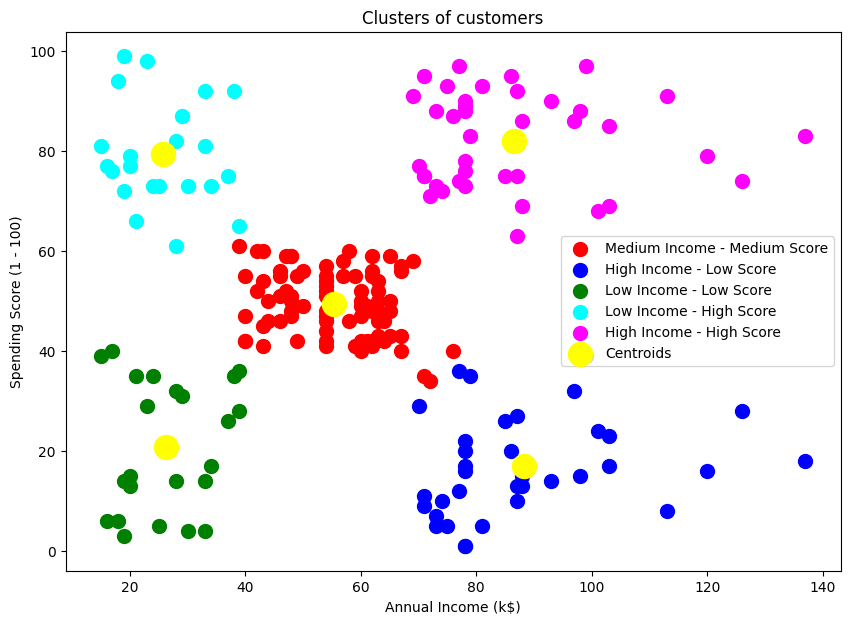

In [274]:
### Visualizing the clusters

plt.figure(figsize = (10, 7))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Medium Income - Medium Score')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'High Income - Low Score')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Low Income - Low Score')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Low Income - High Score')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'High Income - High Score')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1 - 100)')
plt.legend()
plt.show()

# Analyzing the Results

We can see that the supermarket customers can be broadly grouped into 5 groups based on their purchases made in the supermarket.

In cluster 4(green) we can see people have low annual income and low spending scores, this is quite reasonable as people having low salaries prefer to buy less, in fact, these are the wise people who know how to spend and save money. The supermarket will be least interested in people belonging to this cluster.

In cluster 2(cyan) we can see that people have low income but higher spending scores, these are those people who for some reason love to buy products more often even though they have a low income. Maybe it’s because these people are more than satisfied with the mall services. The supermarket might not target these people that effectively but still will not lose them.

In cluster 5(Red) we see that people have average income and an average spending score, these people again will not be the prime targets of the supermarket, but again they will be considered and other data analysis techniques may be used to increase their spending score.

In cluster 1(pink) we see that people have high income and high spending scores, this is the ideal case for the supermarket as these people are the prime sources of profit. These people might be the regular customers of the mall and are convinced by the mall’s facilities.

In cluster 3(Blue) we see that people have high income but low spending scores, this is interesting. Maybe these are the people who are unsatisfied or unhappy by the supermarket services. These can be the prime targets of the supermarket, as they have the potential to spend money. So, the supermarket authorities will try to add new facilities so that they can attract these people and can meet their needs.

Finally, based on our machine learning technique we may deduce that to increase the profits of the mall, the supermarket authorities should target people belonging to cluster 3 and cluster 5 and should also maintain its standards to keep the people belonging to cluster 1 and cluster 2 happy and satisfied.

To conclude, I would like to say that it is amazing to see how machine learning can be used in businesses to enhance profit.

# Predicting Clusters

In [272]:
kmeans.predict([[18,77]])
# Here it says that it  belong to 3rd cluster

array([3])

# Saving the model

In [275]:
import pickle
# It is important to use binary access
with open('kmeans_supermarket_segmentation.pickle', 'wb') as f:
    pickle.dump(kmeans, f)

In [276]:
with open('kmeans_supermarket_segmentation.pickle', 'rb') as f:
    km = pickle.load(f)

In [279]:
# Checking wheither loaded model working or not.

In [277]:
km.predict([[18,77]])

array([3])